EDA on 'Created_utc'

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
file_path = "/content/drive/MyDrive/Colab/all_data.csv"

Read data.

df: 4543567 rows

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv(file_path)
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,sentiment,score,body_cleaned
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,0.5719,2,"['yeah', 'abov', 'comment', 'say', 'base', 'wa..."
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,-0.9877,2,"['ani', 'comparison', 'effici', 'solar', 'foss..."
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,-0.1143,1,"['honest', 'wait', 'climat', 'chang', 'impact'..."
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,0.0000,4,"['sacramento', 'actual', 'happen', 'world', 'c..."
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,0.6634,1,"['think', 'climat', 'chang', 'tend', 'get', 'p..."


df_new : 709237 rows

In [48]:
df['climate_count'] = df['body_cleaned'].apply(lambda x: x.count('climat'))
df['change_count'] = df['body_cleaned'].apply(lambda x: x.count('chang'))
df['body_length'] = df['body_cleaned'].apply(lambda x: len(x))
df['climate_proportion'] = df['climate_count']/df['body_length']
df['change_proportion'] = df['change_count']/df['body_length']

df_new = df[(df['climate_proportion'] > 0.0001) & (df['change_proportion'] > 0.0001) & (df['climate_count'] >= 2) & (df['change_count'] >= 2)]

Distribution

In [49]:
df_new['created_utc'] = pd.to_datetime(df_new['created_utc'], unit='s')
df_new.created_utc.describe()

<ipython-input-49-4f1ccfb4a46e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['created_utc'] = pd.to_datetime(df_new['created_utc'], unit='s')
<ipython-input-49-4f1ccfb4a46e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_new.created_utc.describe()


count                  709237
unique                 707345
top       2019-01-08 15:52:07
freq                        5
first     2010-01-01 00:34:07
last      2022-08-31 23:54:25
Name: created_utc, dtype: object

By year

<ipython-input-56-15bb1e2ff9f8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


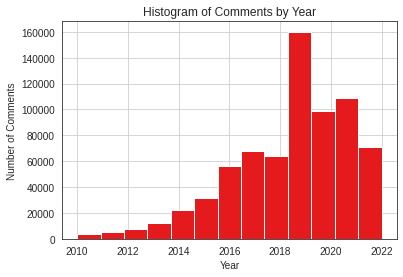

In [56]:
df_new['created_utc'].dt.year.hist(bins=13)

plt.title('Histogram of Comments by Year')
plt.xlabel('Year')
plt.ylabel('Number of Comments')

plt.savefig("comments_by_year")
plt.show()

By month

<ipython-input-57-91ef028adb3e>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


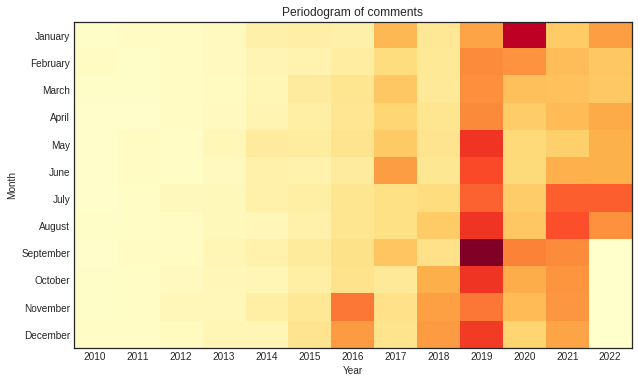

In [57]:
import numpy as np
import calendar

m = np.zeros((12, 13))
for i in range(12):
    for j in range(13):
        year = 2010 + j
        if year == 2022 and i >= 9:
            break
        m[i, j] = df_new[(df_new['created_utc'].dt.year == year) & (df_new['created_utc'].dt.month == i+1)].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-white')
ax.imshow(m, cmap=plt.cm.YlOrRd, interpolation='nearest', aspect='auto')

ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(12))
ax.set_xticklabels([str(x) for x in range(2010, 2023)])
ax.set_yticklabels(calendar.month_name[1:])

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Periodogram of comments')
plt.savefig("comments_by_month")
plt.show()


Correlation with 'sentiment'

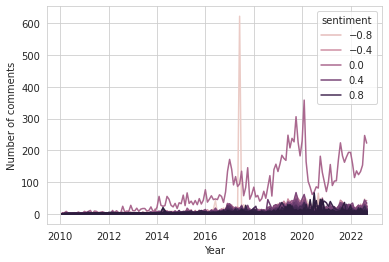

In [54]:

sns.set_style("whitegrid")

counts_df = df_new.groupby([pd.Grouper(key='created_utc', freq='M'), 'sentiment']).size().reset_index(name='count')

sns.lineplot(x='created_utc', y='count', hue='sentiment', data=counts_df)

plt.xlabel('Year')
plt.ylabel('Number of comments')
plt.savefig("time_sentiment_correlation")
plt.show()